## Windy Gridworld with Stochastic Wind (Exercise 6.8)
This is a modification of the Windy Gridworld problem where the effect of the wind is stochastic, sometimes varying by 1 from the mean values given for each column. That is, a third of the time, you move once above that, and another third of the time you move one cell below that.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Coordinates in (row, column) format
INITIAL_STATE = [3, 0]
FINAL_STATE = [3, 7]

WIDTH = 10
HEIGHT = 7
ACTION_COUNT = 8

L, LU, U, RU, R, RD, D, LD = range(0, ACTION_COUNT)
MAX_X = WIDTH - 1
MAX_Y = HEIGHT - 1

In [3]:
class StochasticWindGridworld:
    up_draft = {0:0, 1:0, 2:0, 3:1, 4:1, 5:1, 6:2, 7:2, 8:1, 9:0}
    pos = []
    
    def __init__(self):        
        self.reset()
        
    
    def step(self, action):
        """
        Takes the given action and returns a tuple (next_state, reward, done)
        """
        reward = 0
        done = self.is_final()
        
        if not done:               
            new_pos = np.copy(self.pos)
            reward = -1
            
            # Stochastic wind
            displacement = self.up_draft[self.pos[1]] + np.random.choice([-1, 0, 1])
            
            if action == L:
                new_pos[1] -= 1
            elif action == LU:
                new_pos[0] -= 1
                new_pos[1] -= 1
            elif action == U:
                new_pos[0] -= 1
            elif action == RU:
                new_pos[0] -= 1
                new_pos[1] += 1
            elif action == R:
                new_pos[1] += 1
            elif action == RD:
                new_pos[0] += 1
                new_pos[1] += 1
            elif action == D:
                new_pos[0] += 1
            elif action == LD:
                new_pos[0] += 1
                new_pos[1] -= 1                        
            
            # If final position is valid, move to new location
            if not (new_pos[0] < 0 or new_pos[0] > MAX_Y or new_pos[1] < 0 or new_pos[1] > MAX_X):
                self.pos = new_pos
                
            # Apply upward translation due to wind
            new_y = self.pos[0] - displacement
            self.pos[0] = 0 if (new_y < 0 or new_y > MAX_Y) else new_y
                
        
        return np.copy(self.pos), reward, self.is_final()
    
    def reset(self):
        self.pos = np.copy(INITIAL_STATE)
        return np.copy(self.pos)
        
    def is_final(self):
        return self.pos[0] == FINAL_STATE[0] and self.pos[1] == FINAL_STATE[1]    

In [4]:
def epoch_greedy(Q, state):
    qa = Q[state[0], state[1]]
    prob = np.random.rand(1)
    if prob > epsilon:
        # exploit (greedy)
        action_index = np.random.choice(np.flatnonzero(qa == qa.max()))
    else:
        # explore (random action)
        action_index = np.random.randint(0, ACTION_COUNT)
    
    return action_index

In [5]:
# Same initialization as in text
gamma = 1 # no discount
epsilon = 0.1
alpha = 0.5
Q = np.zeros((HEIGHT, WIDTH, ACTION_COUNT))
steps = 8000

env = StochasticWindGridworld()
step = 0
episodes = 0
s = env.reset()
x, y = [], [] # For plotting

while step < steps:    
    # Select action using policy derived from Q (e-greedy)
    a = epoch_greedy(Q, s)
        
    # Take action and observe next state and reward
    s_, r, done = env.step(a)
    
    # Choose A' from S' using policy derived from Q (e-greedy)
    a_ = epoch_greedy(Q, s_)
    
    # Update
    if done:
        Q[s[0], s[1], a] = Q[s[0], s[1], a] + alpha * (r - Q[s[0], s[1], a])
    else:
        Q[s[0], s[1], a] = Q[s[0], s[1], a] + alpha * (r + gamma * Q[s_[0], s_[1], a_] - Q[s[0], s[1], a])
    
    s = s_
    step += 1
    
    if step % 100 == 0:
        x.append(step)
        y.append(episodes)
    
    # Episode over, reset environment
    if done:
        s = env.reset()
        episodes += 1

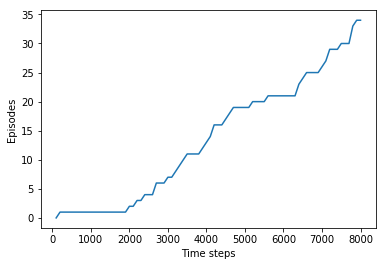

In [6]:
plt.plot(x, y)
plt.xlabel('Time steps')
plt.ylabel('Episodes')
plt.show()

Naturally, since we have a more complex environment, the agent learns much more slowly than in the orignal case completing only 35+ episodes in 8000 steps (compared to 175+).

## References
1. Richard S. Sutton, Andrew G. Barto (1998). Reinforcement Learning: An Introduction. MIT Press.